# 4. Generowanie zmiennych losowych na fraktalach.

Powyższy problem dotyczy generowania zmiennych losowych z "rozkładów fraktalnych". Najprostszym przykładem rozkładu fraktalnego jest $\textbf{zbiór Cantora}$. Na jego podstawie zaimplementujemy generator liczb losowych z rozkładu, którego dystrybuantą jest $\textbf{funkcja Cantora}$.

## 1. Trójkowy zbiór Cantora.

Trójkowy zbiór Cantora definiuje się jako zbiór wszystkich liczb rzeczywistych mających postać:

$$\sum_{i=1}^{\infty} \frac{a_i}{3^{i}}$$

gdzie $a_i\in \{0,2\}$. Zatem jest to zbiór tych liczb rzeczywistych z przedziału $ [ 0,1 ] $, dla których istnieje rozwinięcie w układzie trójkowym w którym nigdzie po przecinku nie występuje jedynka albo występuje jedna i jest ona równocześnie ostatnią cyfrą tego rozwinięcia.

## 2. Rozkład Cantora.

Rozkład Cantora definiujemy jako rozkład, którego dystrybuantą jest funkcja Cantora zdefiniowana następującym wzorem:

Niech $f_0(x)=x$.

Następnie, dla dowolnej liczby całkowitej $n \geq 0$ (gdzie $n$ oznacza rozdzielczość) kolejną funkcję $f_{n+1}(x)$ wyrażamy za pomocą $f_n(x)$ następująco:

$$
  f_{n+1}(x) = \cases{        \frac{1}{2} f_n(3x)       & dla   $ 0\leq x < \frac{1}{3} $ \cr
                1\over2 & dla $ \frac{1}{3}\leq x <  \frac{2}{3}$ \cr
                        \frac{1}{2}  + \frac{1}{2} f_n(3x-2)     & dla $ \frac{2}{3} \leq x \leq 1 $ }
$$


Rozkład Cantora jest przykładem rozkładu który posiada ciągłą dystrybuantę (Funkcję Cantora) $F_n(x)$ dla każdego $n=0,1...$, ale poza zbiorem Cantora - dystrybuanta jest stała. Oznacza to, że rozkład Cantora nie jest rozkładem ciągłym (bo nie posiada gęstości). Taki rozkład nazywamy $\textbf{singularnym}$.


Poniżej zaimplementujemy przykładową funkcję do wyliczania wartości funkcji Cantora w zadanym punkcie i rozdzielczości $n$:


In [26]:
import matplotlib.pyplot as plt
import random


def cantor_theoretical(x, n):
    """ funkcja wyznaczająca wartość funkcji Cantora
        w punkcie x dla zadanej rozdzielczości n """

    if n == 0:
        return x
    else:
        if 0 <= x < 1 / 3:
            return (1 / 2) * cantor_theoretical(3 * x, n - 1)
        elif 1 / 3 <= x < 2 / 3:
            return 1 / 2
        elif (2 / 3) < x <= 1:
            return 1 / 2 + (1 / 2) * cantor_theoretical(3 * x - 2, n - 1)

Zobaczmy przykładowe wywołanie funkcji:

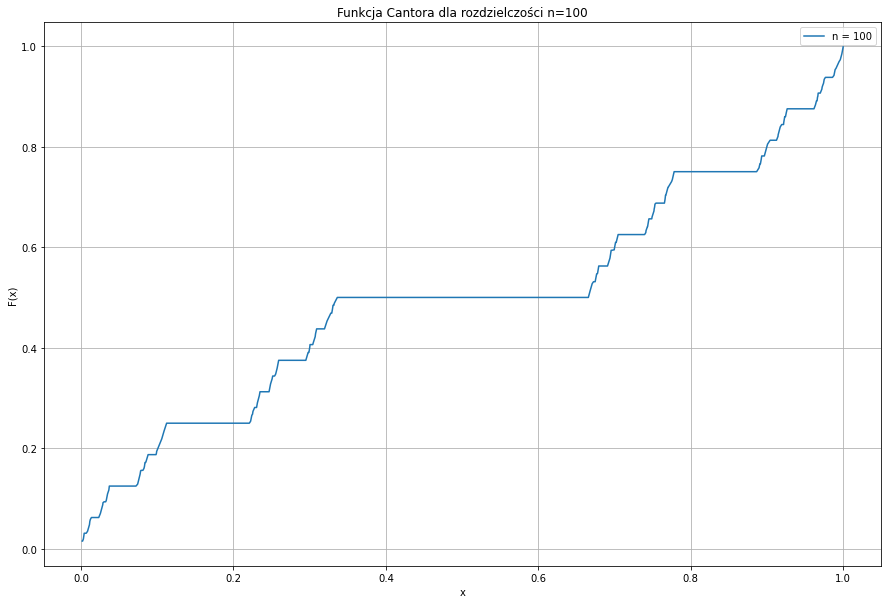

In [74]:
n = 100  # zadana rozdzielczość
xs = sorted([random.random() for i in range(1, 1000)])  # generujemy 1000 zmiennych iid z rozkładu jednostajnego
theoretical = [cantor_theoretical(x, n) for x in xs]  # wyliczamy wartości funkcji cantora dla zmiennych w xs

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(xs, theoretical)
ax.set_title(f"Funkcja Cantora dla rozdzielczości n={n}")
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.legend([f"n = {n}"])
ax.grid()
plt.show()

## 3. Powiązanie zbioru Cantora z rozkładem Cantora.

Posługując się liczbami ze zbioru Cantora, jesteśmy w stanie uzyskać zmienne losowe z rozkładu Cantora, którego dystrybuantą jest funkcja Cantora. Do tego celu użyjemy poniższego generatora:

Zdefiniujmy funkcję, która będzie losowała z jednakowym prawdopodobieństwem liczby ze zbioru $\{0,2\}$:

In [39]:
def variable_generator():
    """funkcja losująca wartości 0 lub 2 z jednakowym prawdopodobieństwem"""
    if random.random() > 1 / 2:
        return 2
    else:
        return 0

Korzystając z powyższej funkcji, możemy zdefiniować nasz generator:

In [40]:
def cantor_distribution(n, N):
    """funkcja do generowania N zmiennych z rozkładu Cantora dla zadanej rozdzielczości n"""
    cantor_variables = []
    for _ in range(0, N):
        X_n = [variable_generator() for _ in range(0, n + 1)]
        variable = sum([X_n[i] / (3 ** (i + 1)) for i in range(0, n + 1)])
        cantor_variables.append(variable)
    return cantor_variables

Aby wyznaczyć rozkład naszych zmiennych losowych z generatora, możemy posłużyć się funkcją do wyznaczania empirycznej dystrybuanty. W tym celu posłużymy się poniższą funkcją: 

In [44]:
def demp(X, x):
    """funkcja wyliczająca wartość dystrybuanty empirycznej w punkcie x dla zadanego rozkładu X """
    values = []
    for i in X:
        if i > x:
            values.append(0)
        else:
            values.append(1)
    return sum(values) / len(X)

Porównajmy teraz funkcję Cantora, z otrzymanymi dystrybuantami empirycznymi w zależności od rozdzielczości n:

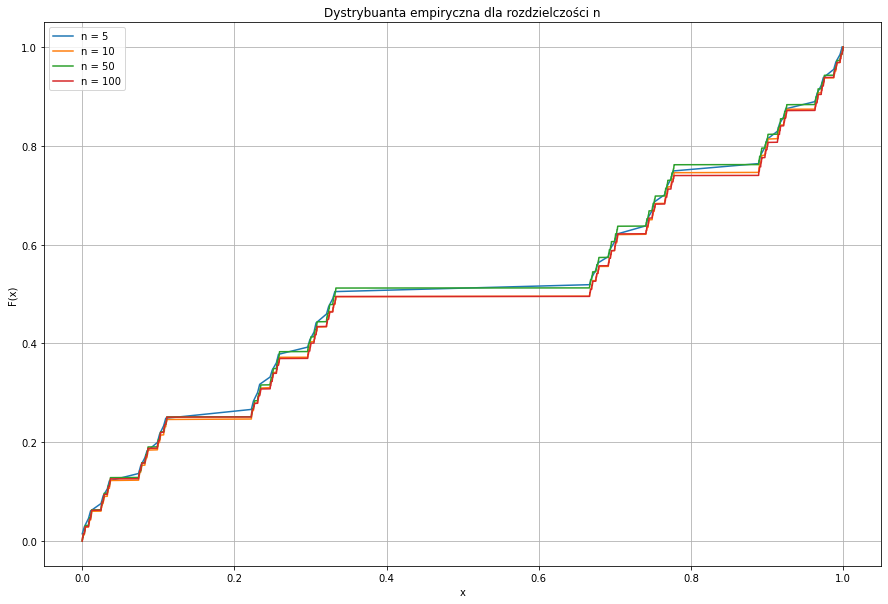

In [75]:
# empiryczne funkcje dystrybuanty

ns = [5, 10, 50, 100]
X1 = sorted(cantor_distribution(ns[0], 10000))  # generujemy 10000 niezależnych zmiennych z naszego generatora
X2 = sorted(cantor_distribution(ns[1], 10000))
X3 = sorted(cantor_distribution(ns[2], 10000))
X4 = sorted(cantor_distribution(ns[3], 10000))

empirical_1 = [demp(X1, x) for x in X1]  # wyliczamy wartość dystrybuanty empirycznej dla każdej zmiennej
empirical_2 = [demp(X2, x) for x in X2]
empirical_3 = [demp(X3, x) for x in X3]
empirical_4 = [demp(X4, x) for x in X4]

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(X1, empirical_1)
ax.plot(X2, empirical_2)
ax.plot(X3, empirical_3)
ax.plot(X4, empirical_4)
ax.set_title("Dystrybuanta empiryczna dla rozdzielczości n")
ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.grid()
ax.legend(["n = " + str(ns[i]) for i in range(0, len(ns))])
plt.show()

## 4. Funkcja charakterystyczna rozkładu Cantora.

Funkcja charakterystyczna rozkładu Cantora przyjmuje postać:

$$\varphi_{X} (t) = e^{it/2} \prod_{k=1}^\infty \cos\left(\frac{t}{3^k}\right)$$

Zbadamy jej przebieg dla różnych rozdzielczości. W tym celu posłużymy się poniższą funkcją:

In [ ]:
import math


def characteristic(t, n):
    """funkcja zwracająca wartość funkcji charakterystycznej rozkładu Cantora dla rozdzielczości n"""
    ks = [i for i in range(1, n + 1)]
    e = np.exp(complex(str(t) + 'j') / 2)
    values = [np.cos(t / (3 ** k)) for k in ks]
    multiplied_values = math.prod(values)
    cf = e * multiplied_values
    return cf

Przykładowe wywołanie funkcji dla rozdzielczości $n=100$

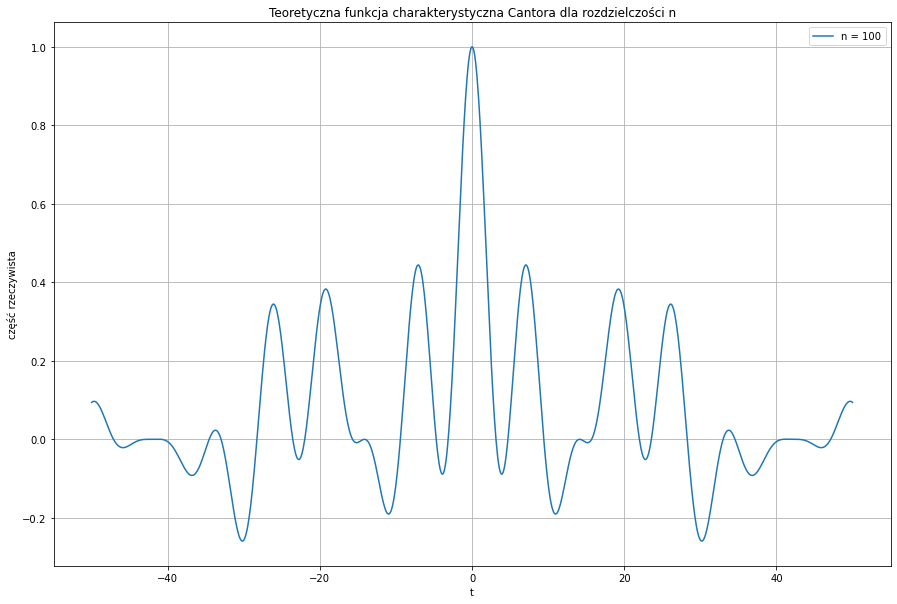

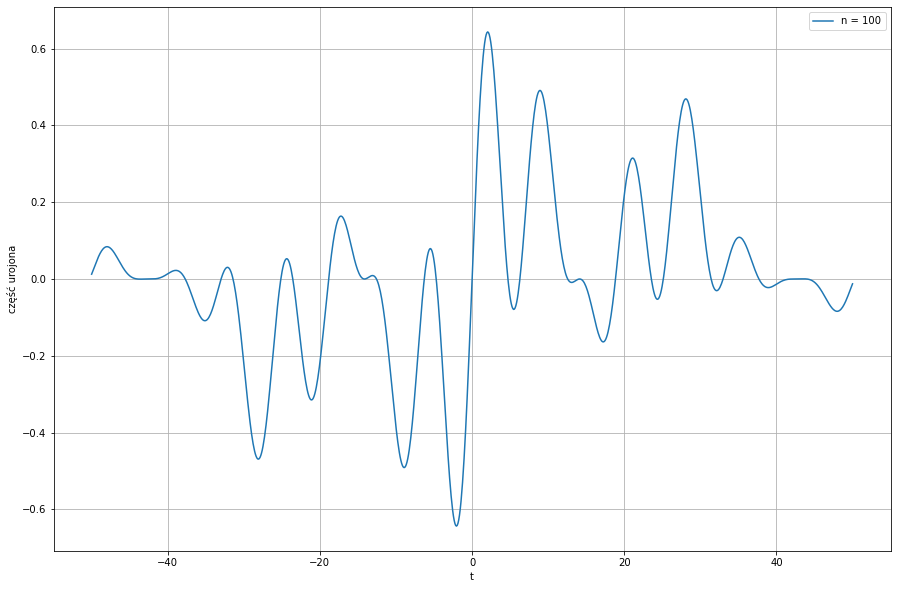

In [76]:
N = 1000
n = 100
t = np.linspace(-50, 50, 1000)

X_1 = cantor_distribution(n, N)
ys_1 = [characteristic(t[i], n) for i in range(0, len(t))]  # wartości funkcji charakterystycznej

im_1 = [y.imag for y in ys_1]  # część urojona funkcji charakterystycznej
re_1 = [y.real for y in ys_1]  # część rzeczywista

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(t, re_1)
ax.set_title('Teoretyczna funkcja charakterystyczna Cantora dla rozdzielczości n')
ax.set_xlabel('t')
ax.set_ylabel('część rzeczywista')
ax.grid()
ax.legend([f"n = {n}"])
plt.show()

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t, im_1)
ax.set_xlabel('t')
ax.set_ylabel('część urojona')
ax.grid()
ax.legend([f"n = {n}"])
plt.show()

Wyznaczmy teraz empiryczną funkcję charakterystyczną. W tym celu użyjemy funkcji zdefiniowanej poniżej. 

In [54]:
def empchar(X, ksi):
    """funkcja wyliczająca empiryczną funkcję charakterystyczną rozkładu X w punkcie ksi"""
    Y = [(np.exp(1)) ** (1j * ksi * i) for i in X]
    return sum(Y) / len(X)

Pokażmy wywołanie naszej funkcji dla kilku przykładowych rozdzielczości:

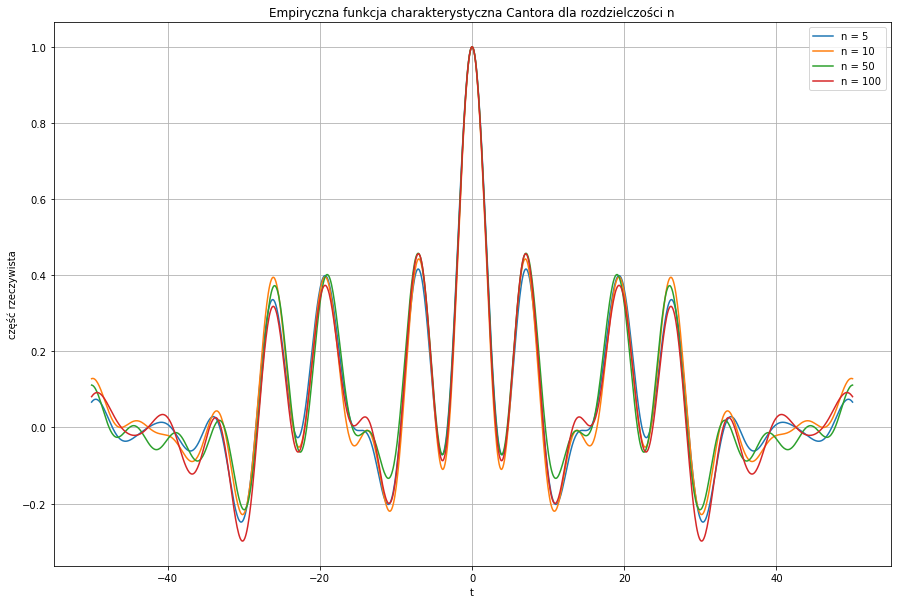

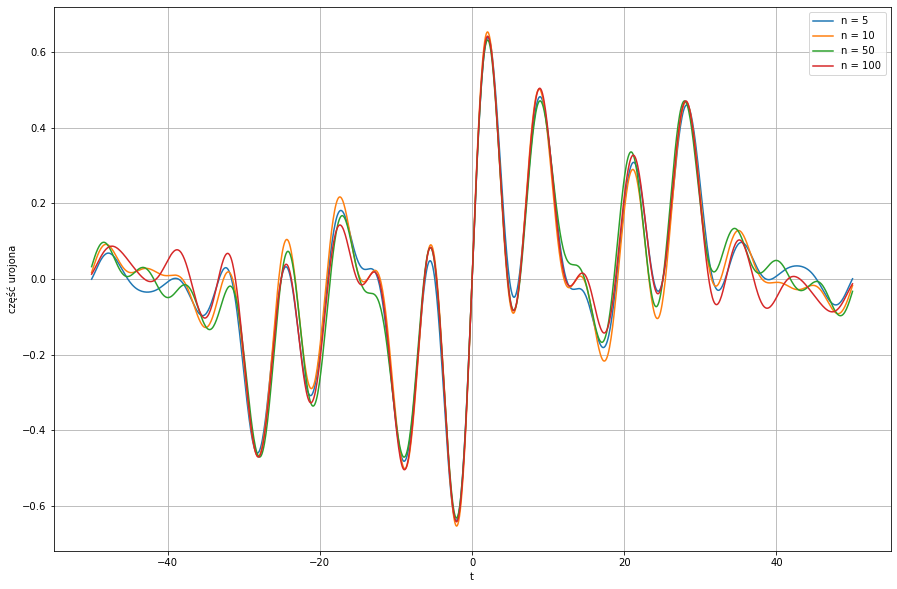

In [77]:
X_1 = cantor_distribution(ns[0], N)
X_2 = cantor_distribution(ns[1], N)
X_3 = cantor_distribution(ns[2], N)
X_4 = cantor_distribution(ns[3], N)

ys_1 = [empchar(X_1, t[i]) for i in range(0, len(t))]
ys_2 = [empchar(X_2, t[i]) for i in range(0, len(t))]
ys_3 = [empchar(X_3, t[i]) for i in range(0, len(t))]
ys_4 = [empchar(X_4, t[i]) for i in range(0, len(t))]

im_1 = [y.imag for y in ys_1]
im_2 = [y.imag for y in ys_2]
im_3 = [y.imag for y in ys_3]
im_4 = [y.imag for y in ys_4]

re_1 = [y.real for y in ys_1]
re_2 = [y.real for y in ys_2]
re_3 = [y.real for y in ys_3]
re_4 = [y.real for y in ys_4]

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(t, re_1)
ax.plot(t, re_2)
ax.plot(t, re_3)
ax.plot(t, re_4)
ax.set_title('Empiryczna funkcja charakterystyczna Cantora dla rozdzielczości n')
ax.set_xlabel('t')
ax.set_ylabel('część rzeczywista')
ax.grid()
ax.legend(["n = " + str(ns[i]) for i in range(0, len(ns))])
plt.show()

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t, im_1)
ax.plot(t, im_2)
ax.plot(t, im_3)
ax.plot(t, im_4)
ax.set_xlabel('t')
ax.set_ylabel('część urojona')
ax.grid()
ax.legend(["n = " + str(ns[i]) for i in range(0, len(ns))])
plt.show()

## 5. Uogólniony generator.

Uogólnimy nasz generator do przypadku, w którym użytkownik zadaje podstawę $p$ i zbiór $A=\{i_1...i_k\}$, $i_j \in \{0,...p-1\}$ definiujące fraktal $C$ taki, że $a \in C$ wtedy i tylko wtedy, gdy $a=\sum_{i=1}^{\infty} \frac{a_i}{3^{i}}$, $a_i \in A$

Poniżej przedstawiona jest nasza funkcja:

In [ ]:
def fractal(A, p, n):
    """generator zmiennej losowej a przyjmujący zbiór A, podstawę p oraz rozdzielczość n jako argumenty"""
    numbers = [random.randint(0, len(A) - 1) for _ in range(1, n + 1)]
    numbers = [A[number] for number in numbers]
    a = [numbers[i] / (p ** (i + 1)) for i in range(0, n)]
    a = sum(a)
    return a

Sprawdźmy teraz, jak wyglądają dystrybuanty dla najciekawszych przypadków:

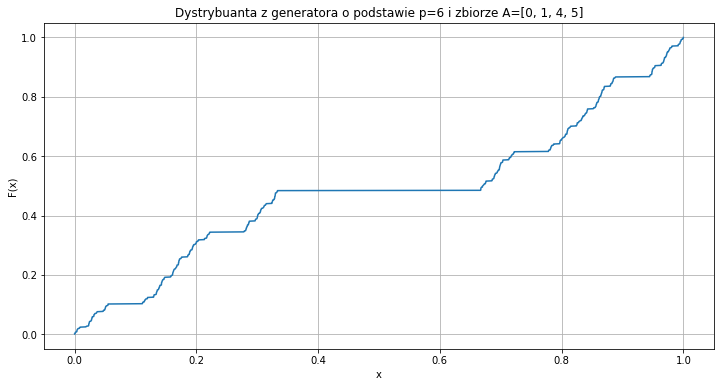

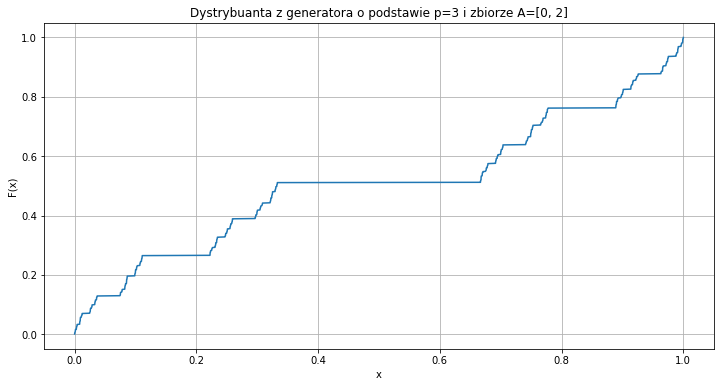

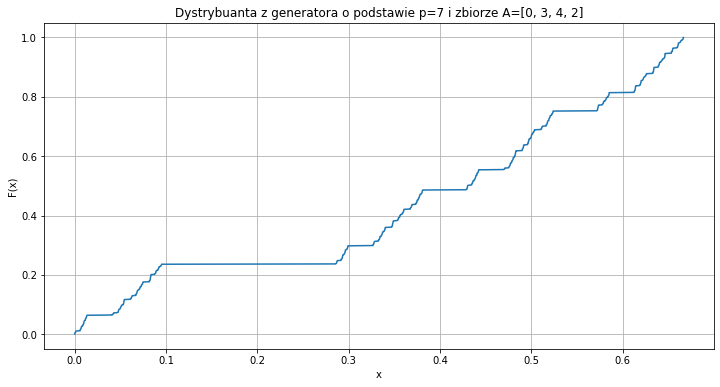

In [78]:
t = np.linspace(-50, 50, 1000)

ps=[6,3,7]
As=[[0,1,4,5],[0,2],[0,3,4,2]]

for i in range(0,len(ps)):
    
    X = sorted([fractal(As[i],ps[i],1000) for j in range(0,1000)])
    empirical = [demp(X, x) for x in X]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(X,empirical)
    ax.set_xlabel('x')
    ax.set_ylabel('F(x)')
    ax.set_title(f'Dystrybuanta z generatora o podstawie p={ps[i]} i zbiorze A={As[i]}')
    ax.grid() 
    plt.show()
    

Teraz spójrzmy na funkcje charakterystyczne:

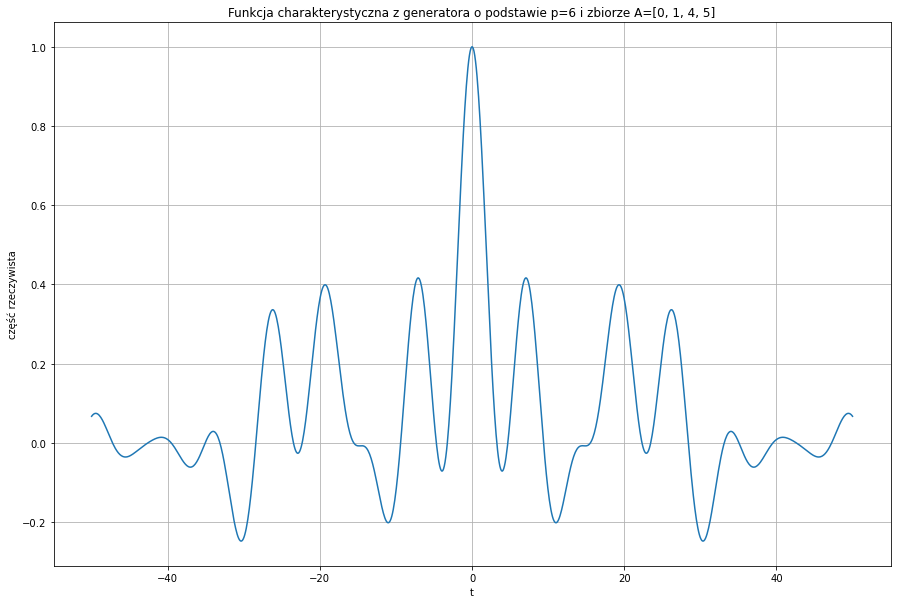

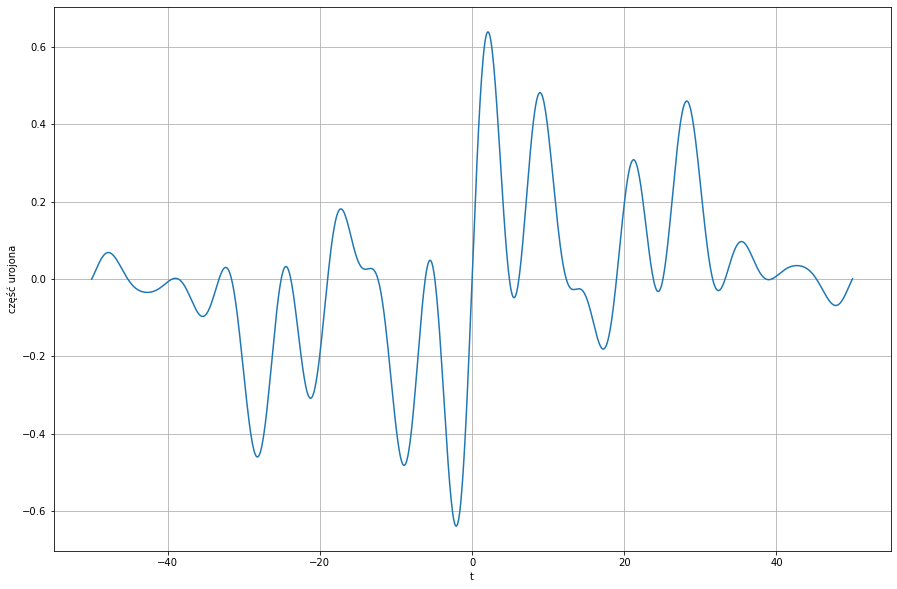

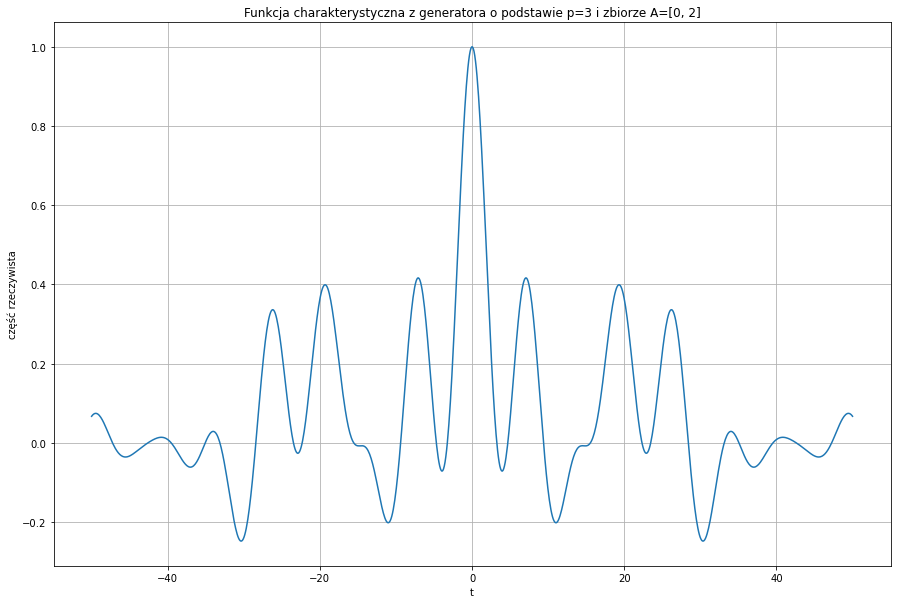

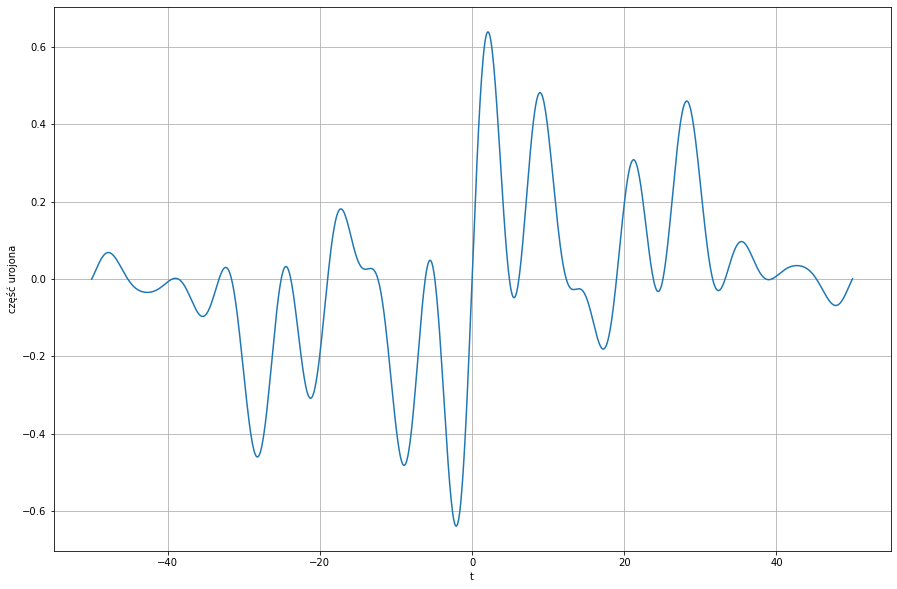

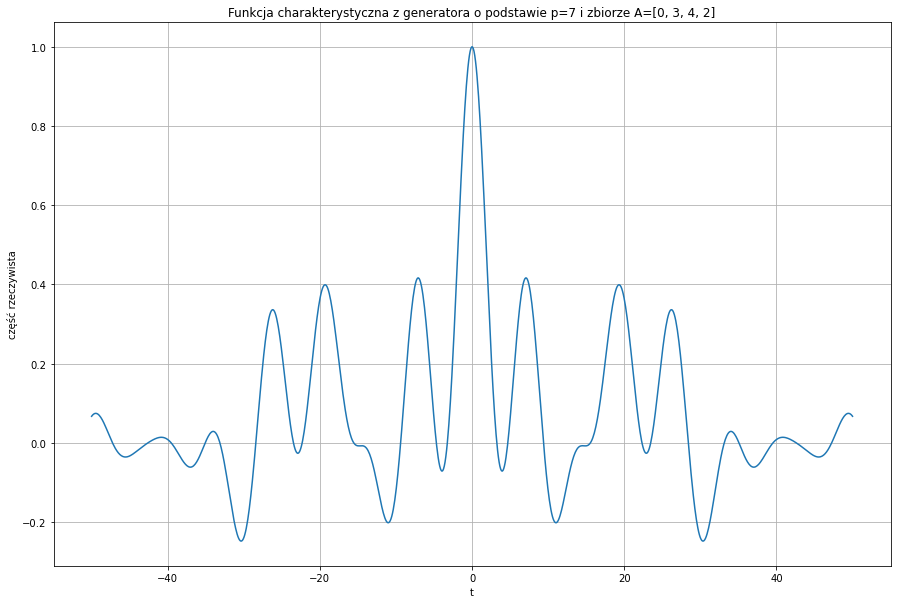

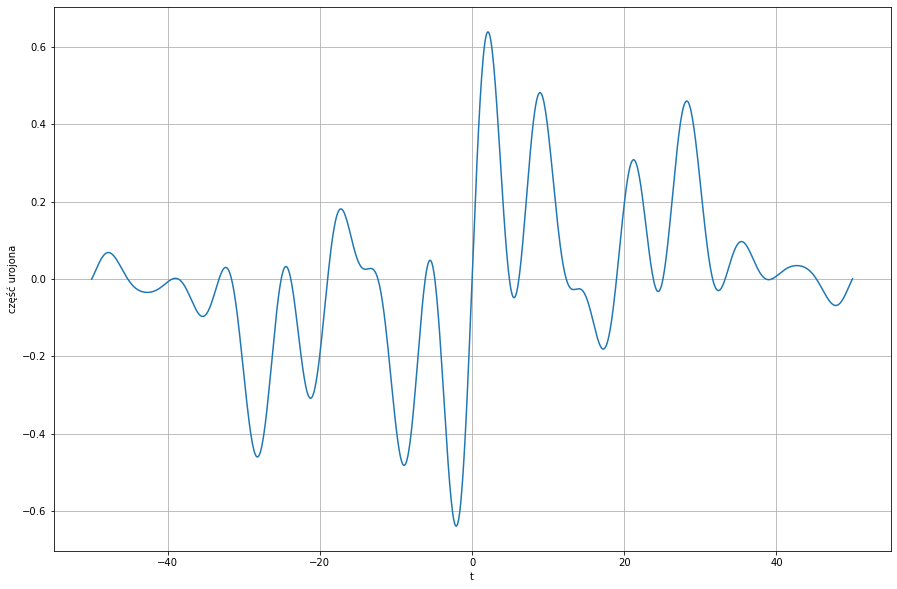

In [80]:
t = np.linspace(-50, 50, 1000)

ps=[6,3,7]
As=[[0,1,4,5],[0,2],[0,3,4,2]]

for i in range(0,len(ps)):
    
    X = sorted([fractal(As[i],ps[i],1000) for j in range(0,1000)])
    ys = [empchar(X_1, t[j]) for j in range(0, len(t))]
    im = [y.imag for y in ys]
    re = [y.real for y in ys]
    
    fig, ax = plt.subplots(figsize=(15, 10))

    ax.plot(t, re)
    ax.set_title(f'Funkcja charakterystyczna z generatora o podstawie p={ps[i]} i zbiorze A={As[i]}')
    ax.set_xlabel('t')
    ax.set_ylabel('część rzeczywista')
    ax.grid()
    plt.show()

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.plot(t, im)
    ax.set_xlabel('t')
    ax.set_ylabel('część urojona')
    ax.grid()
    plt.show()

# 6. Problem sekretarki
Powyższy problem jest rozszerzeniem klasycznego problemu sekretarki, który polega na określeniu strategi służącej do wybrania najlepszej kandydatki na stanowisko. W rozwiązaniu zostaną wykorzystane własne generatory. Generator z rozkładu jednostajnego jest generatorem opartych na rejestrach zmiennych, a generatory z rokładu normalnego i wykładniczego opierają się na metodzie odwracania dystrybuanty.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as st


def seedgenerator(p):
    seed = ""
    for i in range(p):
        jad = str(random.randint(0, 1))
        seed += jad
    return seed


def genratorunif300(a, b, ile):
    '''funckja generująca zadaną ilość liczb z rozkładu jednostajnego  U(a,b) dla zadanego a i b '''

    slist = [int(x) for x in seedgenerator(16)]
    for i in range(16, 16 * ile):
        slist.append(slist[i - 5] ^ slist[i - 16])

    strslist = ''
    for i in slist:
        strslist = strslist + str(i)

    listak = [strslist[i:i + 16] for i in range(0, len(strslist), 16)]
    listw = [int(i, 2) / (2 ** 16) for i in listak]

    b1 = a
    a1 = b - b1

    koncowka = [(a1 * i + b1) for i in listw]

    return koncowka


def normalnownik300(a, b, ile):
    u = genratorunif300(0, 1, ile)
    result = st.norm.ppf(u, loc=a, scale=b)
    return result


def wykladnik5000(l, ile):
    u = genratorunif300(0, 1, ile)
    result = st.expon.ppf(u, scale=l)
    return result


### Zmienne M i S
za pomocą własnych generatorów generujemy zmienne M i S

In [15]:
M=normalnownik300(0,1,1)
S=genratorunif300(0.8,1.5,1)

## Strategia zatrudniania analityków

Podczas zatrudniania analityków naszym celem jest maksymalizacja prawdopodobieństwa, że analitycy będą trzema najlepszymi. W tym celu:
1. przesłuchujemy grupę testową złożoną z N kandydatów.
2. określamy maksymalną wartość umiejętności z grupy testowej
3. jeśli kolejny kandydat ma umiejętności wyższe niż maksymalna wartość z grupy testowej zostaje przyjęty w przeciwnym przypadku jest odrzucony
4. jeśli nie znaleźliśmy żadnego pracownika spełniającego nasze kryterium a pozostało trzech kandydatów zostają oni zatrudnieni, analogiczna sytuacja zachodzi gdy mamy jednego zatrudnionego i dwóch ostatnich kandydatow, oraz dwóch zatrudnionych i ostatniego kandydata

W celu określenia optymalnej liczby N dla każdej możliwej wielkości grupy testowej (od 1 do 79) wykonamy 1000 prób jeśli wybrani kandydaci są najlepsi suma początkowo równa 0 zwiększa się o 1. Po wykonaniu wszystkich prób dzielimy sumę przez 1000 tym samym otrzymujemy prawdpopodobieństwo dla danej wielkości grupy. W momencie, w którym mamy określone prawdopodobieństwo dla każdej możliwej wielkości grupy wybieramy największe prawdopodobieństwo,tym samym określając najlepszy rozmiar grupy. 


In [5]:
def testerA(ile):
    lista = normalnownik300(M, S, 80)

    maksik = max(lista[:ile])
    k = 0
    wybrancy = []
    for i in lista[ile:]:
        if i >= maksik and k < 3:
            wybrancy.append(i)
            k += 1
    if sorted(wybrancy) == sorted(lista)[-3:]:

        return 1, wybrancy
    else:
        if len(wybrancy) == 0:
            wybrancy.extend(lista[-3:])
            return 0, wybrancy
        elif len(wybrancy) == 1:
            wybrancy.extend(lista[-2:])
            return 0, wybrancy
        elif len(wybrancy) == 2:
            wybrancy.extend(lista[-1:])
            return 0, wybrancy
        elif len(wybrancy) == 3:
            return 0, wybrancy

## Strategia zatrudniania programistek
Podczas zatrudniania programistek mamy na celu zmaksymalizowanie sumy umiejętności. W tym celu:
1. przesłuchujemy grupę testową złożoną z N kandydatek.
2. określamy maksymalną wartość umiejętności z grupy testowej
3. jeśli kolejny kandydatka ma umiejętności wyższe niż maksymalna wartość z grupy testowej zostaje przyjęty w przeciwnym przypadku jest odrzucony
4. jeśli nie znaleźliśmy żadnej pracowniczki spełniającego nasze kryterium a pozostały trzy kandydatki zostają one zatrudnione, analogiczna sytuacja zachodzi gdy mamy jedną zatrudnioną i dwie ostatnie kandydatki, oraz dwie zatrudnione i ostatnią kandydatke

Żeby określić optymalną wielkość próby testowej, podobnie jak w przypadku analityków dla każdej możliwej wielkości zostanie wykonane 1000 prób do początkowej sumy=0 z kolejną próbą będą dodawane sumy umiejętności, następnie końcową sumę dzielimy przez 1000 otrzymując średnią sumę umiejętności. Gdy dla każdej możliwej wartości N będziemy mieli wartość sumy sprawdzamy która jest największa tym samym określając najlepszą wartość N.

In [7]:
def testerP(ile):
    lista = normalnownik300(M, S, 100)
    maksik = max(lista[:ile])

    k = 0
    wybrane = []
    for i in lista[ile:]:
        if i >= maksik and k < 3:
            wybrane.append(i)
            k += 1

    if len(wybrane) == 3:

        return sum(wybrane), wybrane
    else:
        if len(wybrane) == 0:
            wybrane.extend(lista[-3:])

            return sum(wybrane), wybrane
        elif len(wybrane) == 1:
            wybrane.extend(lista[-2:])

            return sum(wybrane), wybrane
        elif len(wybrane) == 2:
            wybrane.extend(lista[-1:])

            return sum(wybrane), wybrane

## Strategia zatrudniania testerów
Zatrudniając testerów musimy zmaksymalizować prawdopodobieństwo, że znajdują się oni w najlepszych 10%, w tym celu:
1. Przesłuchujemy grupę testową złożoną z N kandydatów
2. określami 9 decyl z próby testowej
3. jeśli wartość umiejętności kandydata jest większa niz wartość 9 decyla z próby testowej zostaje przyjęt.
4. kiedy wybierzemy 3 kandydatów sprawdzamy czy wszyscy znajdują się w 10% najlepszych ze wszystkich, jeśli tak nasza funkcja zwraca wartośc 1 oraz listę z umiejętnościami wybranych kandydatów.


W celu określenia najlepszej wartości N, analogicznie jak dla analityków dla każdego N wykonujemy 1000 prób jeśli udało nam się wybrać kandydatów z najlepszych 10% do sumy (początkowo równej 0) dodajemy 1, gdy wykonamy wszystkie 1000 prób dzielimy sumę przez tysiąc otrzymując prawdopodobieństwo wybrania najlepszych 10%. Następnie gdy mamy prawdopodobieństwo dla każdego możliwego N wybieramy największe tym samym określając najlepsze N

In [9]:
def testerT(ile):
    lista = normalnownik300(M, S, 120)

    powyzej10 = np.percentile(lista[:ile], np.arange(0, 100, 10))[9]
    k = 0
    wybrancy = []

    for i in lista[ile:]:
        if i > powyzej10 and k < 3:
            wybrancy.append(i)
            k += 1

    if len(wybrancy) == 3 and sorted(wybrancy)[0] > np.percentile(lista, np.arange(0, 100, 10))[9]:

        return 1, wybrancy
    else:
        if len(wybrancy) == 0:
            wybrancy.extend(lista[-3:])

            return 0, wybrancy
        elif len(wybrancy) == 1:
            wybrancy.extend(lista[-2:])

            return 0, wybrancy
        elif len(wybrancy) == 2:
            wybrancy.extend(lista[-1:])

            return 0, wybrancy

        elif len(wybrancy) == 3:

            return 0, wybrancy

## Wybór najlepszego N dla analityków, programistek i testerów

In [10]:
def montecarlownik(tester, m, ile):
    w = 0
    for i in range(m):
        w += tester(ile)[0]
    return (w / m)

In [17]:
def symulator(tester, ile):
    symulacje = []
    for i in range(1, ile):
        symulacje.append(montecarlownik(tester, 1000, i))

    indeks = symulacje.index(max(symulacje))
    return indeks+1, symulacje[indeks]

print(symulator(testerA,80))
print(symulator(testerP,100))
print(symulator(testerT,120))

(17, 0.15)
(10, 12.523653406875)
(52, 0.702)


## wartości N oraz odpowiadającym im prawdopodobieństwą  oraz sumie

### 1. analitycy: najlepsze N to 17, dla którego prawdopodobieństwo $ \pi=0.15$
### 2. programistki: najlepsze N to 10, dla którego suma wyniosła $ \sigma \approx 12.52$
### 3. testerzy: najlepsze N to 52, dla którego prawdopodobieństwo $ \rho=0.702$ 


## Strategia maksymalizacji zysków 

Strategia będzie polegała na wybieraniu zleceń o cenie $ \leq 0.1$, jeśli wartość będzie ujęmną wartością, w celu minimalizowania strat. Jeśli natomiast wartość jest dodatnia to zlecenia bedą przyjmowane w momencie w którym cena będzie się znajdowała poniżej 2 decyla próby 10000 zmiennych losowych z rozkładu z którego pochodzi,oraz analogicznie dla wartości tylko zamiast 2 decyla bierzemy 8.
### Pseudokod

1. generujemy srednią
2. dopóki nie przyjmiemy 3 zleceń, generujemy cene, wartość z zadanych rozkładów oraz próby 10000 zmiennych losowych z tych rozkładów
3. jeśli wartość jest ujemna przyjmujemy zlecenie gdy cena $\leq 0.1$
4. jeśli wartość jest dodatnia to czekamy aż cena będzię się znajdować poniżej 2 centyla z próby a wartośc powyżej 8 centyla
5. następnie generujemy liczbę z U(0,1) jeśli jest mniejsza od prawdopodobieństwa znalezienia błędu przez testera zwiększamy zysk,natomiast w przeciwnej sytuacji notujemy straty
6. po przyjęciu 3 zleceń zwracamy zysk(albo strate)

In [18]:
def wybieracz(p, t, a):
    srednia = max([0.5, 2.5 - min(a)])
    zysk = 0
    zlecenia = 0
    prawdop = [st.norm.cdf(i) for i in t]

    while zlecenia < 3:
        cena = wykladnik5000(srednia, 1)[0]
        if sum(p) > 0:
            wartosc = wykladnik5000(sum(p), 1)[0]
            probkawartosci = wykladnik5000(sum(p), 10000)
            powyzej10wartosc = np.percentile(probkawartosci, np.arange(0, 100, 10))[8]
        elif sum(p) < 0:
            wartosc = (-1) * wykladnik5000(-sum(p), 1)[0]

        probkacen = wykladnik5000(srednia, 10000)
        ponizej10cena = np.percentile(probkacen, np.arange(0, 100, 10))[2]

        if wartosc < 0:

            if cena <= 0.1:
                zlecenia += 1
                zysk = zysk + wartosc - cena
            else:
                pass



        else:

            if wartosc >= powyzej10wartosc and cena <= ponizej10cena:
                zlecenia += 1

                if genratorunif300(0, 1, 1)[0] < prawdop[0]:

                    zysk = zysk + (wartosc - cena)
                    del prawdop[0]
                elif genratorunif300(0, 1, 1)[0] > prawdop[0]:

                    zysk -= cena
                    del prawdop[0]

            else:
                pass
    return zysk

## Rysowanie histogramu, określanie prawdopodobieństwa bankructwa i oraz ilości zysków

In [19]:
def zyskiwacz(ileA,ileP,ileT,powtorzenia):
    zyskistraty=[]
    for i in range(powtorzenia):
        analitycy=testerA(ileA)[1]
        programistki=testerP(ileP)[1]
        testerzy=testerT(ileT)[1]
        zyskistraty.append(wybieracz(programistki,testerzy,analitycy))
    return zyskistraty

## Histogram zysków

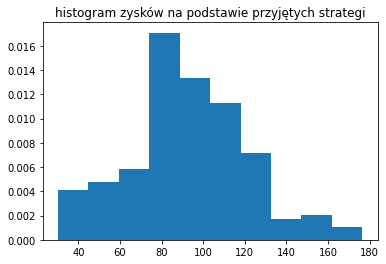

In [27]:
pieniadze=zyskiwacz(17,10,52,200)

plt.hist(pieniadze,density=True)
plt.title('histogram zysków na podstawie przyjętych strategi')
plt.show()

## obliczanie prawdopobieństwa bankructwa

In [ ]:
def pbankrut(zyski):
    strata=0
    for i in zyski:
        if i<0:
            strata+=1
    
    return (strata/len(zyski))


print(pbankrut(pieniadze))


In [31]:
print(sum(pieniadze)/200)

93.01824073813981


## Średnia wartość zysku dla 200 prób wynosi  $z\approx 93.02$

## Wnioski 
Prawdopodobieństwo bankructwa jest równe 0 z powodu tego, że próba jest zbyt mała (najlepiej by było gdyby miała wielkość $\geq 1000$, ale z powodu czasu wykonywania kodu ma wielkość 200). Biorąc pod uwagę średnie zyski można uznać że strategie zatrudniania oraz doboru zleceń są skuteczne.  